# Result Visualization Notebook

This notebook visualizes the results of our LLM-based social network simulation.

In [1]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
# plt.style.use('seaborn')

## Load Analysis Results

In [2]:
snapshot = "" # "/snapshots/N" siendo N la snapshot a analizar

carpeta = "simulation_results_20241026_220546"
dir = '../data/'+carpeta+'/analysis/'+snapshot

with open(dir+'/centrality.json', 'r') as f:
    centrality = json.load(f)

with open(dir+'/communities.json', 'r') as f:
    communities = json.load(f)

with open(dir+'/influencers.json', 'r') as f:
    influencers = json.load(f)

with open(dir+'/engagement_rates.json', 'r') as f:
    engagement_rates = json.load(f)

with open(dir+'/agent_evolution.json', 'r') as f:
    agent_evolution = json.load(f)

with open(dir+'/influencer_trends.json', 'r') as f:
    influencer_trends = json.load(f)

with open(dir+'/message_data.json', 'r') as f:
    messages = json.load(f)

## Visualize Centrality Distribution

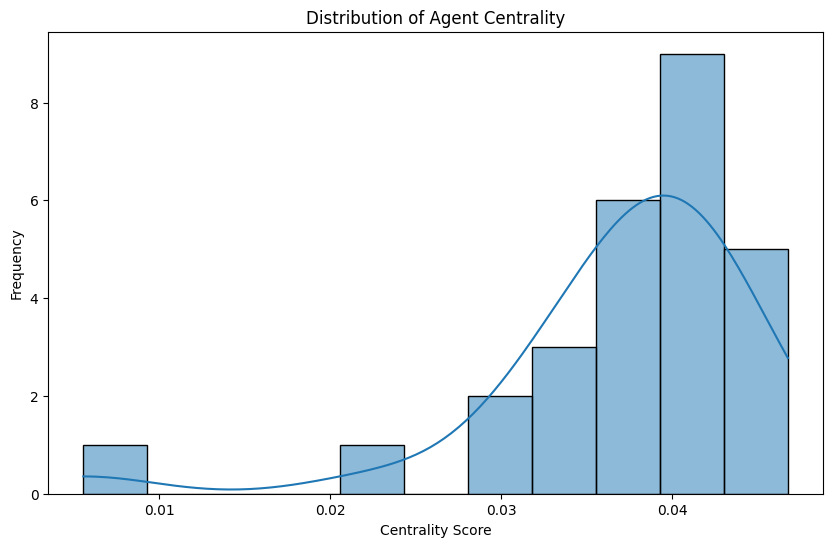

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(list(centrality.values()), kde=True)
plt.title("Distribution of Agent Centrality")
plt.xlabel("Centrality Score")
plt.ylabel("Frequency")
plt.show()

## Visualize Community Sizes

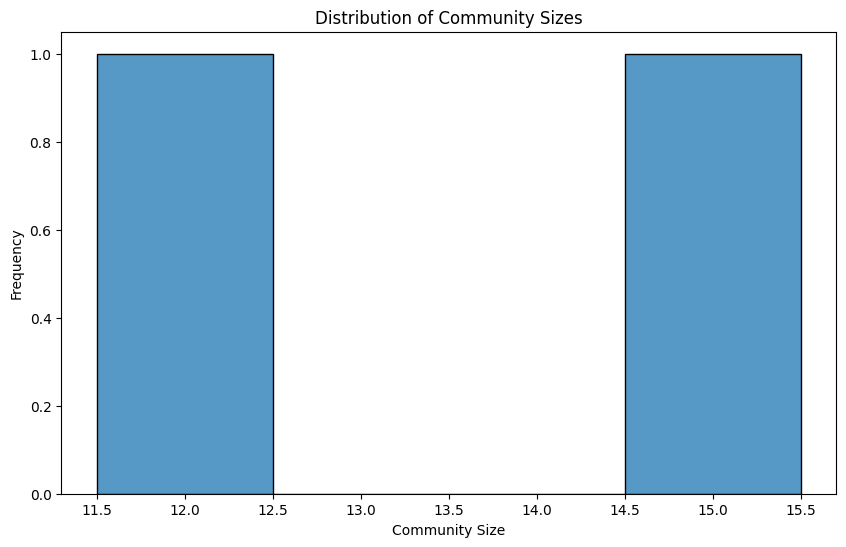

Number of communities: 2
Average community size: 13.50


In [4]:
community_sizes = [len(c) for c in communities]

plt.figure(figsize=(10, 6))
sns.histplot(community_sizes, kde=False, discrete=True)
plt.title("Distribution of Community Sizes")
plt.xlabel("Community Size")
plt.ylabel("Frequency")
plt.show()

print(f"Number of communities: {len(communities)}")
print(f"Average community size: {sum(community_sizes) / len(communities):.2f}")

## Analyze Influencers

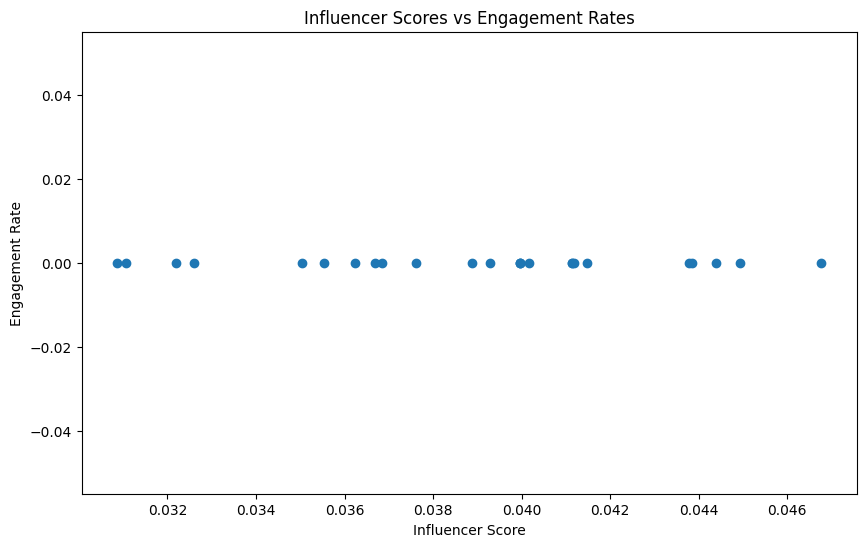

Number of identified influencers: 25
Average influencer score: 0.0389
Average engagement rate: 0.0000


In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(list(influencers.values()), list(engagement_rates.values()))
plt.title("Influencer Scores vs Engagement Rates")
plt.xlabel("Influencer Score")
plt.ylabel("Engagement Rate")
plt.show()
print(f"Number of identified influencers: {len(influencers)}")
print(f"Average influencer score: {sum(influencers.values()) / len(influencers):.4f}")
print(f"Average engagement rate: {sum(engagement_rates.values()) / len(engagement_rates):.4f}")

## Visualize Influencer Trends

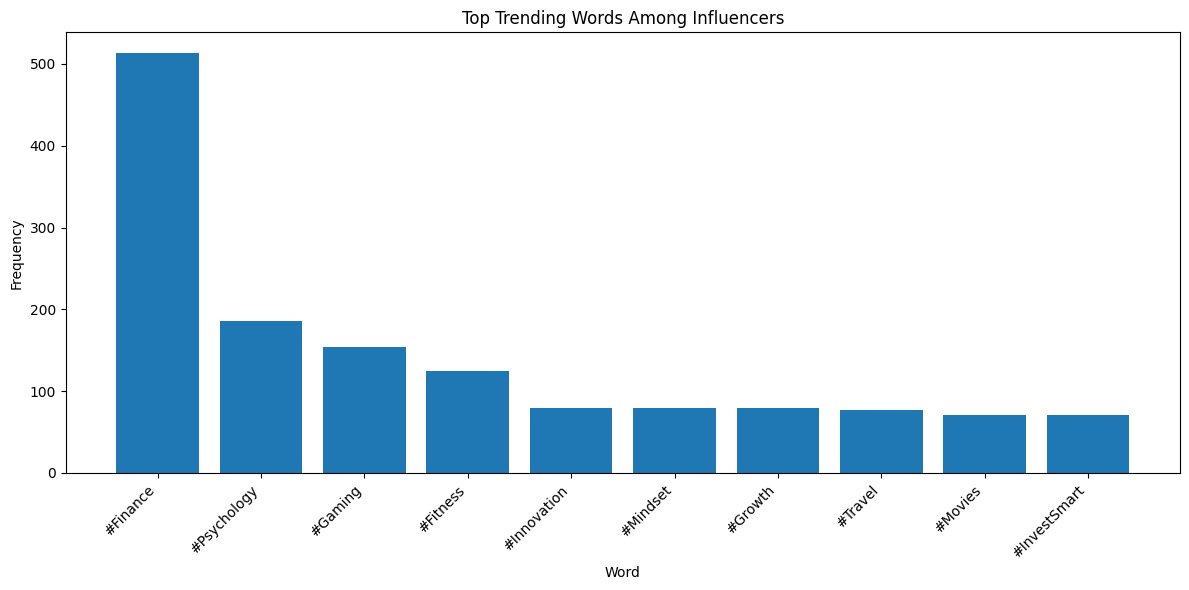

In [6]:
trend_words, trend_counts = zip(*influencer_trends)

plt.figure(figsize=(12, 6))
plt.bar(trend_words, trend_counts)
plt.title("Top Trending Words Among Influencers")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze Agent Evolution

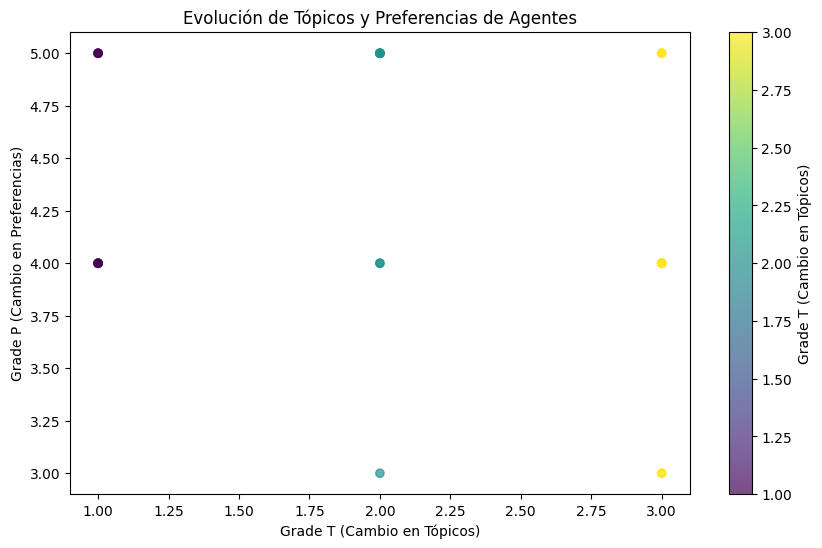

In [7]:
agents = list(agent_evolution.keys())
grade_t = [agent_evolution[agent]['grade_t'] for agent in agents]
grade_p = [agent_evolution[agent]['grade_p'] for agent in agents]
plt.figure(figsize=(10,6))
scatter = plt.scatter(grade_t, grade_p, c=grade_t, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Grade T (Cambio en Tópicos)')

plt.xlabel('Grade T (Cambio en Tópicos)')
plt.ylabel('Grade P (Cambio en Preferencias)')
plt.title('Evolución de Tópicos y Preferencias de Agentes')
plt.grid(False)
plt.show()

## Analyze Message

#### Message Sentiments

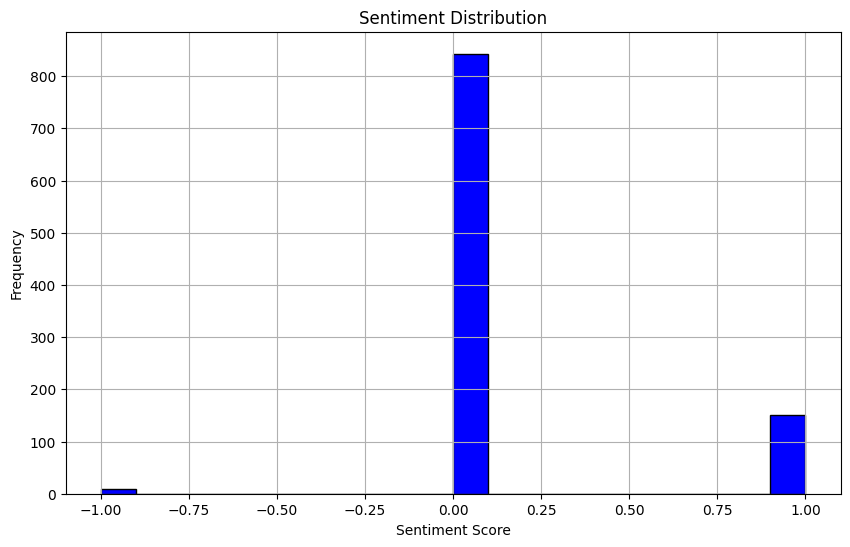

In [8]:
sentiments = messages['sentiments']

plt.figure(figsize=(10, 6))
plt.hist(sentiments, bins=20, color='blue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Message Sentiments Polarization

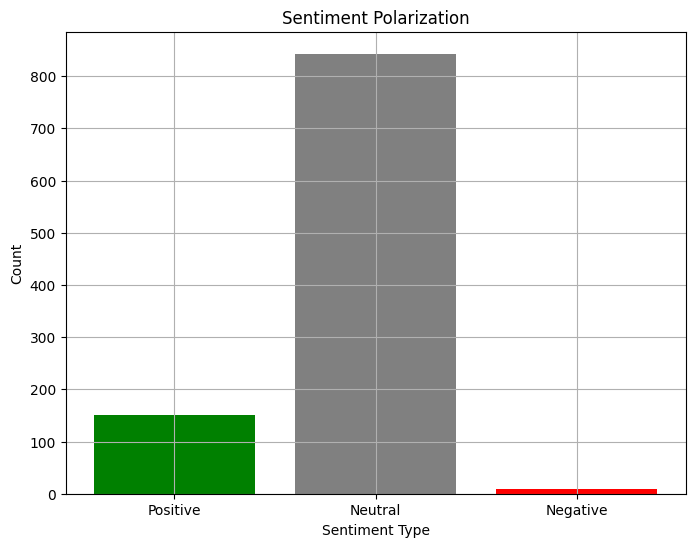

In [9]:
positive_count = messages['positive_count']
neutral_count = messages['neutral_count']
negative_count = messages['negative_count']

labels = ['Positive', 'Neutral', 'Negative']
counts = [positive_count, neutral_count, negative_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'gray', 'red'])
plt.title('Sentiment Polarization')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.grid(True)
plt.show() 

#### Message Top Topics

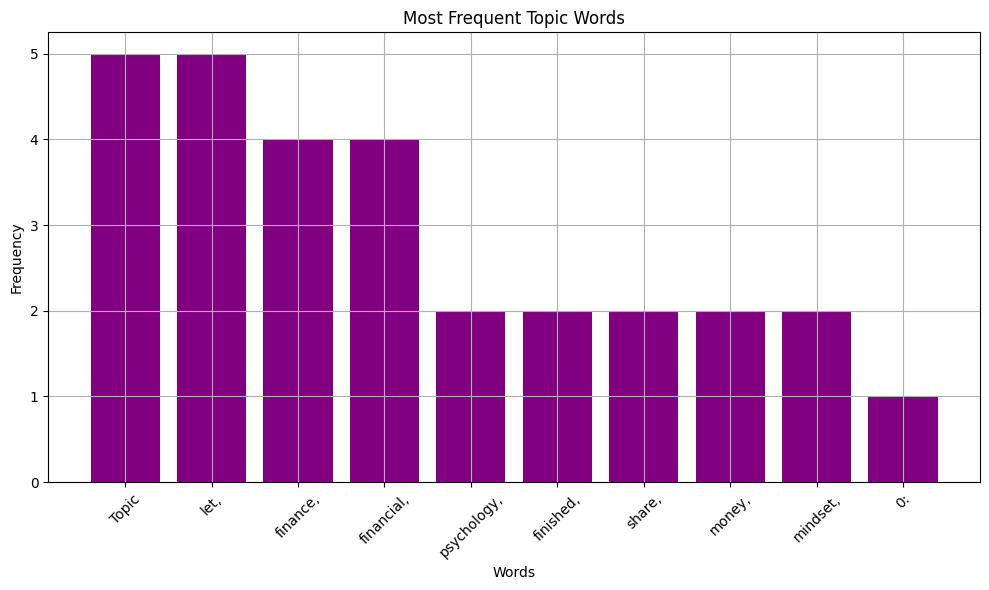

In [10]:
topics = messages['topics']
topic_counts = Counter([word for topic in topics for word in topic.split()])
most_common_topics = topic_counts.most_common(10)
labels, counts = zip(*most_common_topics)

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='purple')
plt.title('Most Frequent Topic Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Message Propagation

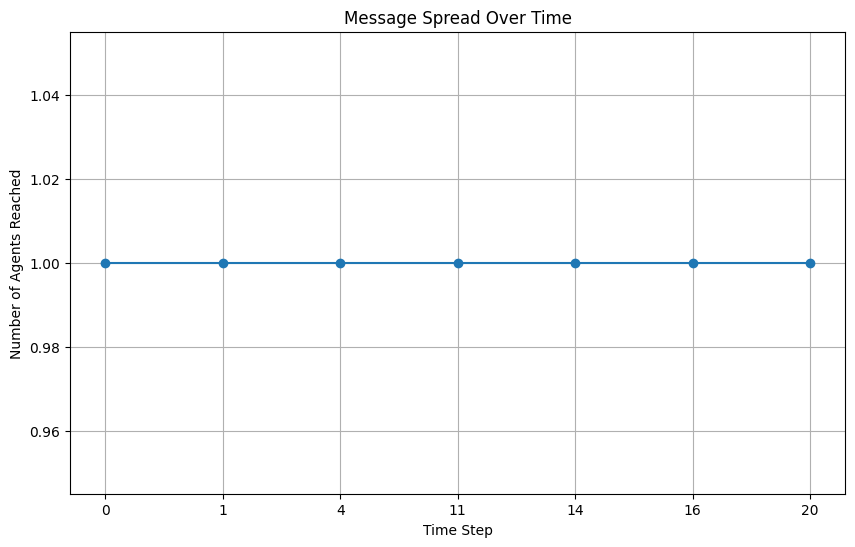

In [11]:
spread = messages['spread']

plt.figure(figsize=(10, 6))
plt.plot(list(spread.keys()), list(spread.values()), marker='o')
plt.title('Message Spread Over Time')
plt.xlabel('Time Step')
plt.ylabel('Number of Agents Reached')
plt.grid(True)
plt.show()

#### Message Count Per Agent

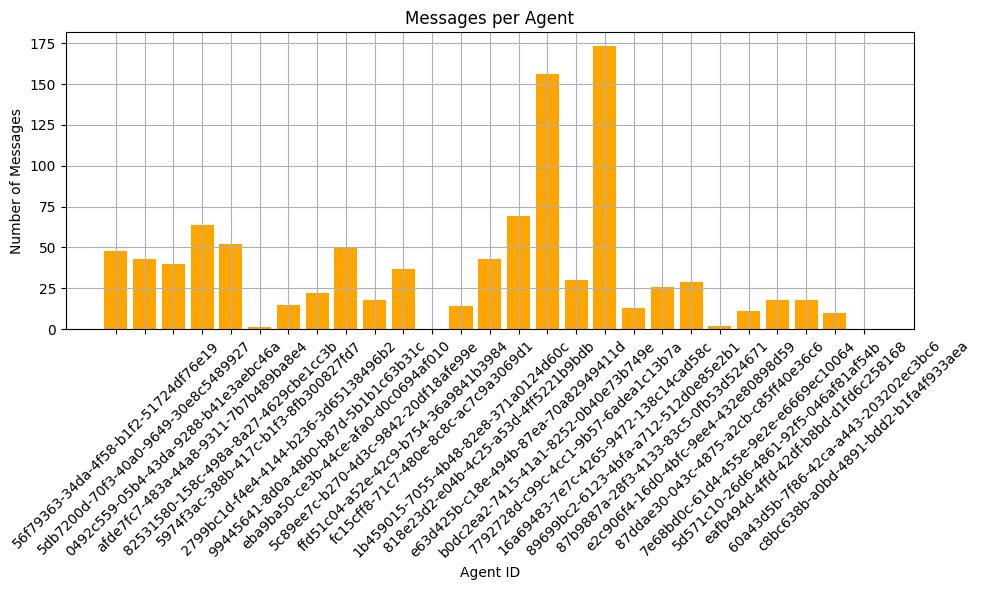

In [12]:
message_counts = messages['message_counts']
agent_ids = list(message_counts.keys())
counts = list(message_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(agent_ids, counts, color='orange')
plt.title('Messages per Agent')
plt.xlabel('Agent ID')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
dir = '../data/'+carpeta
with open(dir+'/agent_data.json', 'r') as f:
    agentes = json.load(f)

original_traits = {}
final_traits = {}

for agent in agentes:
    original_traits[agent] = list(agentes[agent]["personality"].keys())

for agente in agent_evolution:
    # print(list(agentes[agente]["personality"].keys()))
    for carac in (agent_evolution[agente]["detected_traits_and_preferences"].split("\n")[0].strip()).split(","):
        if agente in final_traits:
            final_traits[agente].append(carac.strip())
        else:
            final_traits[agente] = [carac.strip()]
print(final_traits["fc15cff8-71c7-480e-8c8c-ac7c9a3069d1"])

['openness', 'curiosity', 'agreeableness', 'optimism', 'resilience']


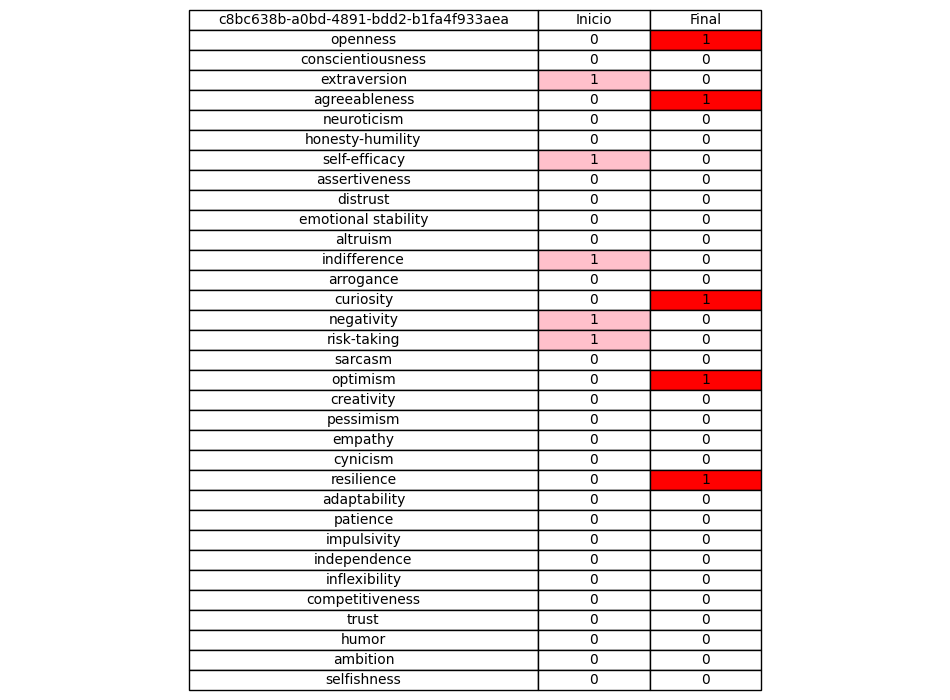

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml

with open('../config/sim_config.yaml', 'r') as file:
    personalidades = (yaml.safe_load(file))['agents']['personality_traits']

data = {}

for agent in agentes:
    data[agent] = {
        agente: personalidades,
        'Inicio':[1 if elemento in original_traits[agent] else 0 for elemento in personalidades],  # 1 representa una característica adoptada, 0 representa una no adoptada
        'Final': [1 if elemento in final_traits[agent] else 0 for elemento in personalidades]
    }


# Crear DataFrame y transponerlo
agent = "fc15cff8-71c7-480e-8c8c-ac7c9a3069d1"  # Indicar aquí el agente de interés
df = pd.DataFrame(data[agent])

# Configurar la figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))  # Aumentar el tamaño de la figura

# Ocultar el marco
ax.axis('tight')
ax.axis('off')

# Crear la tabla
tabla = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Ajustar el ancho de la primera columna y el de las demás
tabla.auto_set_column_width([0])  # Ajustar automáticamente solo la primera columna
tabla[0, 0].set_width(0.3)  # Ancho personalizado para la primera columna (más ancho)
for col in range(1, len(df.columns)):
    for row in range(len(df) + 1):  # Incluyendo los encabezados
        tabla[row, col].set_width(0.1)  # Ancho más pequeño para las demás columnas

# Colorear las celdas en rojo donde el valor es 1
for i in range(1,len(df.index) + 1):  # +1 para incluir la fila de encabezados
    for j in range(1, len(df.columns)):  # +1 para incluir la columna de encabezados
        cell = tabla[i, j]
        if df.values[i - 1, j] == 1:  # Ajustar índices para el contenido
            if j==2:
                cell.set_facecolor("red")
            else:
                cell.set_facecolor("pink")
                
        else:
            cell.set_facecolor("white")
# Ajustes de diseño y mostrar
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.2)
plt.show()
